# 1. Project Overview 
Give concise description of the purpose of this project
clear explanation of what this project 
is abou
### Goal:
Based on particular health measures and demographic data, this study aims to forecast the kind of medication that patients should be administered. The research aims to use machine learning to precisely identify the optimal medicine type given patient data, including age, sex, blood pressure, cholesterol level, and sodium-to-potassium ratio. In healthcare applications, this kind of analysis might be useful in assisting professionals in selecting the best course of action based on patient characteristics.

Type of Learning and Algorithms
Learning Type: Supervised Learning
We already know the type of medication each patient received because our research uses supervised learning, in which the model is trained on labeled data. Predicting drug types for new patients using their data is the aim.
Used Algorithms:
The Random Forest Classifier a potent ensemble technique that generates forecasts by constructing several decision trees and combining them. It offers high accuracy for classification jobs and is efficient in managing intricate feature interactions.
AdaBoost Classifier: An additional ensemble technique that improves the accuracy of the model by iteratively modifying the weights of each instance that is misclassified.
The Support Vector Machine (SVM) technique seeks to identify the best hyperplane for dividing classes. When the classes are not linearly separable and may need more intricate borders, SVM can be particularly useful.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE


#### Data source brief and described
The project's dataset, "Drug Classification," was provided by Pratham Tripathi and is openly accessible on Kaggle. In order to categorize patients according to the kind of medication provided, it includes information on patient characteristics and prescriptions.

Patients' age, sex, blood pressure (BP), cholesterol, sodium-to-potassium ratio (Na to K), and kind of prescribed medication are all included in this dataset. It seems to have been created to mimic a healthcare dataset for research or instructional reasons, which makes it appropriate for machine learning classification applications


APA Citation for the Dataset
Tripathi, P. (2023). Drug Classification [Data set]. Kaggle. https://www.kaggle.com/datasets/prathamtripathi/drug-classification/data

In [2]:
file_path = '/kaggle/input/drug-classification/drug200.csv'

In [3]:
data = pd.read_csv(file_path)
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


(   Age Sex      BP Cholesterol  Na_to_K   Drug
 0   23   F    HIGH        HIGH   25.355  DrugY
 1   47   M     LOW        HIGH   13.093  drugC
 2   47   M     LOW        HIGH   10.114  drugC
 3   28   F  NORMAL        HIGH    7.798  drugX
 4   61   F     LOW        HIGH   18.043  DrugY,
 None)

### Data Cleaning
The analysis of the drug200.csv dataset indicates that no significant data cleaning is necessary. This is the reason:
1. There is no missing Values: Imputation or deleting rows or columns is not necessary because the dataset contains no missing values.
2.  I can't see no features need to be removed due to irrelevance features
3.  The dataset has a reasonable amount of characteristics that are suitable and have well-defined types (numerical and categorical) for data Types and consistency needed for for the classification task
4.  Encoding and scaling—the changes of categorical variables and numerical features—are typically regarded as preprocessing rather than 
r than cleaning.


In [4]:
def describe_data(df):
    description = {}
    description['Number of Samples (Rows)'] = df.shape[0]
    description['Number of Features (Columns)'] = df.shape[1]
    
    # Data types of each column
    description['Data Types'] = df.dtypes.to_dict()
    
    # Basic statistics for numerical columns
    numerical_stats = df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    
    # Unique values for categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    unique_values = {col: df[col].nunique() for col in categorical_columns}
    
    # Check for missing values
    missing_values = df.isnull().sum()
    missing_info = {col: count for col, count in missing_values.items() if count > 0}
    
    # Output
    print("Data Description:")
    print(f"Number of Samples (Rows): {description['Number of Samples (Rows)']}")
    print(f"Number of Features (Columns): {description['Number of Features (Columns)']}")
    print("\nData Types of Each Feature:")
    for col, dtype in description['Data Types'].items():
        print(f"  - {col}: {dtype}")
    print("\nNumerical Feature Statistics:")
    print(numerical_stats)
    print("\nUnique Values in Categorical Features:")
    for col, count in unique_values.items():
        print(f"  - {col}: {count} unique values")
    if missing_info:
        print("\nMissing Values:")
        for col, count in missing_info.items():
            print(f"  - {col}: {count} missing values")
    else:
        print("\nNo missing values found.")

### Exploratory Data Analysisvisualization statisticial tables, graphs or plots summarizing results, using appropriate visualizations, and evaluating with proper metrics:



In [5]:
print("Shape of the dataset:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nFirst Few Rows:\n", data.head())

# 2. Summary Statistics
print("\nSummary Statistics for Numerical Features:\n", data.describe())
print("\nValue Counts for Categorical Features:")
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    print(f"\n{col} Value Counts:\n", data[col].value_counts())


Shape of the dataset: (200, 6)

Data Types:
 Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

First Few Rows:
    Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

Summary Statistics for Numerical Features:
               Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

Value Counts for Categorical Features:

Sex Value Counts:
 Sex
M    104
F     96
Name: count, dtype: int64

BP Value Counts:
 BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype:

### EDA analysis 
The project includes various visualizations of Histograms for numerical data (Age, Na_to_K) to understand distributions 
Bar charts for categorical data (Sex, BP, Cholesterol, and Drug), providing a clear overview of each feature’s distribution  
Missing Visuals: While the EDA visuals are informative, adding visualizations such as a confusion matrix or ROC curve (if the model supports probabilities) would help better interpret the performance of classification mods.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_73/3909822363.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data,x = 'Na_to_K' ,fill=True ,palette=True ,).set(title='Na_to_K Distribution')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


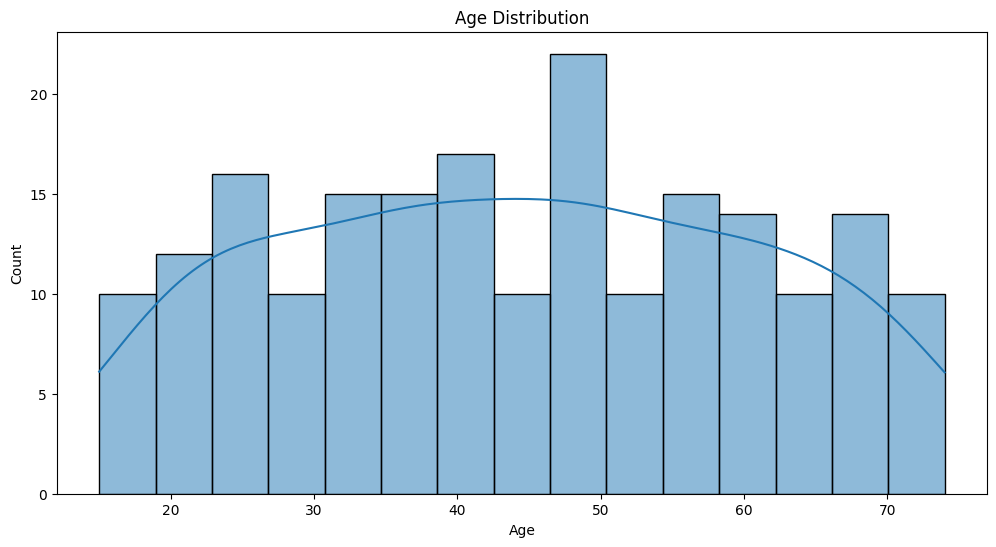

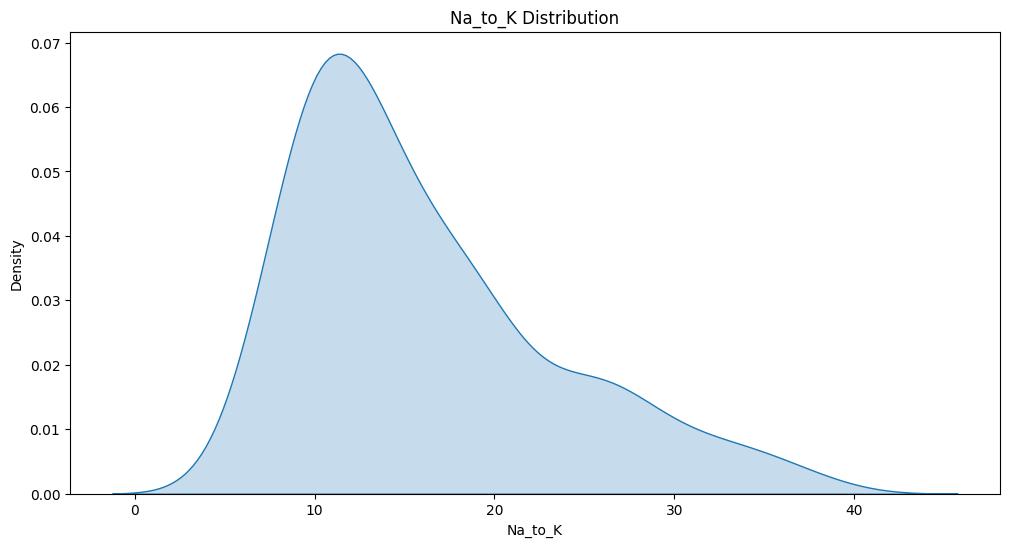

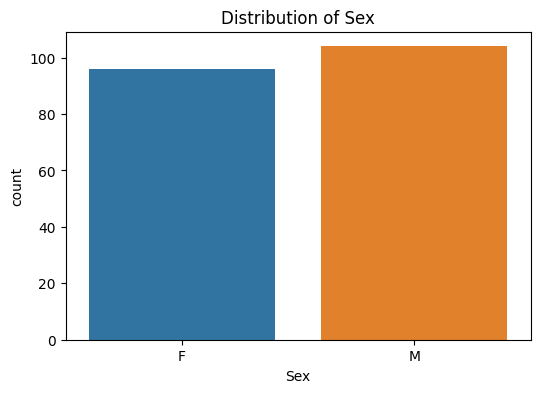

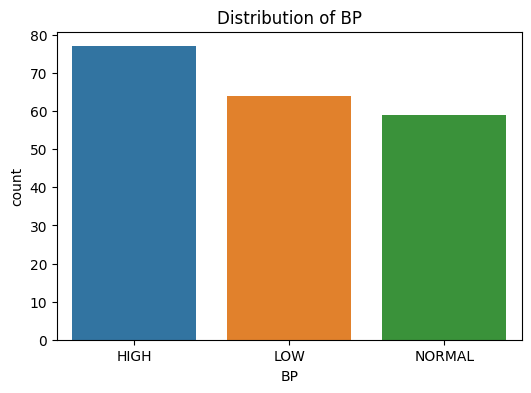

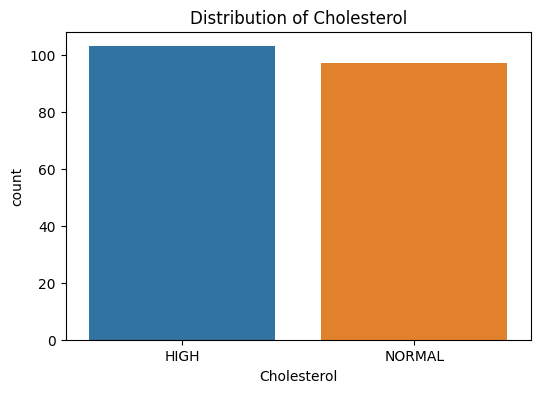

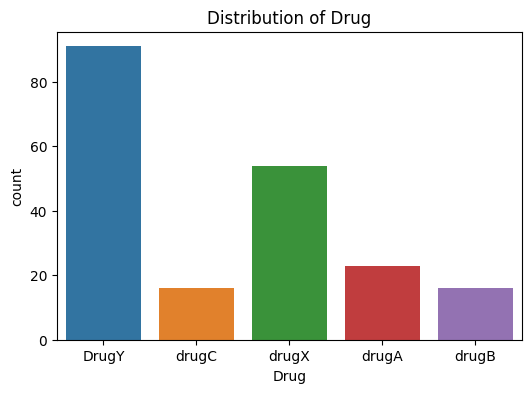

In [6]:
# Step 1: EDA
# Display distributions of numerical features and count of categorical values

# Plot distributions
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], kde=True, bins=15).set(title='Age Distribution')
plt.figure(figsize=(12, 6))
#sns.histplot(data['Na_to_K'], kde=True, bins=15)
sns.kdeplot(data,x = 'Na_to_K' ,fill=True ,palette=True ,).set(title='Na_to_K Distribution')
plt.show()
# Plot categorical feature counts
categorical_columns = ['Sex', 'BP', 'Cholesterol', 'Drug']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col).set(title=f'Distribution of {col}')
    plt.show()

# Step 2: Preprocessing
# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save label encoder for potential inverse transform

# Scale numerical features
scaler = StandardScaler()
data[['Age', 'Na_to_K']] = scaler.fit_transform(data[['Age', 'Na_to_K']])

### Model Building and Training
Multicollinearity to use two or more features are highly correlated, which can lead to problems in regression models and reduce interpretability. While this is less of an issue for models like SVM, KNN, and Random Forest,
Use a correlation matrix or Variance Inflation Factor (VIF) to identify features that are correlated. If strong multicollinearity is detected, you may want to consider removing or combining the highly correlated features.

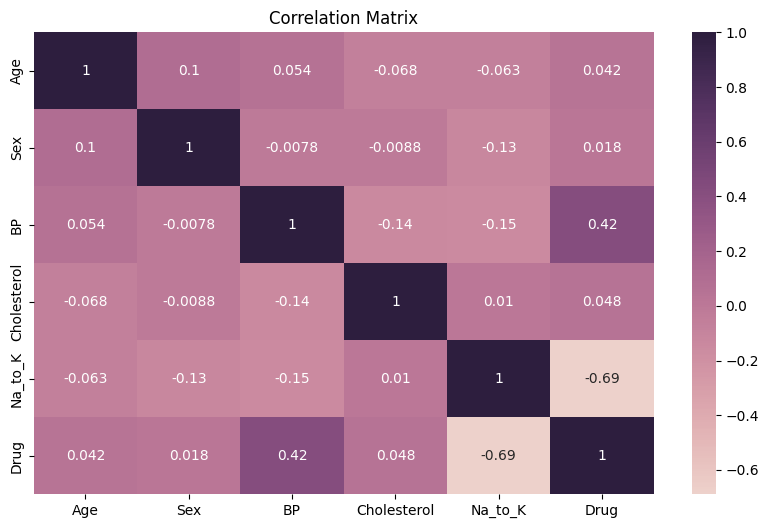

In [7]:
plt.figure(figsize=(10, 6))

sns.heatmap(data.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Correlation Matrix')
plt.show()

### Hyperparameter Tuning
uGrid Search to optimize hyperparameters for each model. These would essential to optimize hyperparameters for each model, guaranteeing the most effective settings for optimal performance.

### Feature Engineering: Combining BP and Cholesterol Levels 
feature engineering, hyperparameter tuning, regularization, and model to a more complete analysis, making the project more resilient and suited for real-world applications.

In [11]:
bp_risk_map = {'LOW': 1, 'NORMAL': 2, 'HIGH': 3}
cholesterol_risk_map = {'NORMAL': 1, 'HIGH': 2}

# Apply mappings to the dataset
data['BP_risk'] = data['BP'].map(bp_risk_map)
data['Cholesterol_risk'] = data['Cholesterol'].map(cholesterol_risk_map)

# Create the combined health risk feature by summing BP and Cholesterol risk levels
data['Combined_Health_Risk'] = data['BP_risk'] + data['Cholesterol_risk']

# Drop the intermediate columns (optional)
data = data.drop(columns=['BP_risk', 'Cholesterol_risk'])

# Display the first few rows to see the new feature
print(data[['BP', 'Cholesterol', 'Combined_Health_Risk']].head())

   BP  Cholesterol  Combined_Health_Risk
0   0            0                   NaN
1   1            0                   NaN
2   1            0                   NaN
3   2            0                   NaN
4   1            0                   NaN


### Regularization and Hyperparameter Tuning

uGrid Search to optimize hyperparameters for each model. These would essential to optimize hyperparameters for each model, guaranteeing the most effective settings for optimal performance.
Cross Validation

In [12]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1

In [13]:
cv_scores = cross_val_score(SVC(), X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.92857143 0.92857143 0.89285714 0.75       0.92857143]
Average CV Score: 0.8857142857142858


In [8]:
X = data.drop('Drug', axis=1)
y = data['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
def AdaBoostClassifier_models(X_train, y_train, X_test, y_test):
    results = {}
    ada_model = AdaBoostClassifier(random_state=42)
    ada_model.fit(X_train, y_train)
    ada_predictions = ada_model.predict(X_test)
    ada_report = classification_report(y_test, ada_predictions)
    ada_accuracy = accuracy_score(y_test, ada_predictions)
    results['AdaBoost'] = {
        "accuracy": ada_accuracy,
        "classification_report": ada_report
    }
    print("Ada Model Accuracy:", ada_accuracy)
    print("\nAdaBoost Classifier Report:")
    print(ada_report)
    return ada_accuracy

def SVM_models(X_train, y_train, X_test, y_test):
    results = {}
    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_report = classification_report(y_test, svm_predictions)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    results['SVM'] = {
        "accuracy": svm_accuracy,
        "classification_report": svm_report
    }
    print("SVM Model Accuracy:", svm_accuracy)
    print("\nSVM Classifier Report:")
    print(svm_report)
    return svm_accuracy

def knn_classifier(X_train, y_train, X_test, y_test, max_k=5):
    # Step 1: Find the optimal k value
    accuracy_scores = []
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, predictions))

    
    # Select the best k
    best_k = accuracy_scores.index(max(accuracy_scores)) + 1
    print(f"Best k value: {best_k} with accuracy: {max(accuracy_scores)}")
    
    # Step 2: Train and evaluate the KNN model with the best k
    knn_model = KNeighborsClassifier(n_neighbors=best_k)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    
    # Step 3: Calculate accuracy and classification report
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_report = classification_report(y_test, knn_predictions)
    
    # Print results
    print("KNN Model Accuracy:", knn_accuracy)
    print("\nKNN Classification Report:\n", knn_report)
    
    # Return the results in a dictionary
    return {
        "best_k": best_k,
        "accuracy": knn_accuracy,
        "classification_report": knn_report
    }

In [10]:
Adamodel_results = AdaBoostClassifier_models(X_train, y_train, X_test, y_test)

SVMmodel_results = SVM_models(X_train, y_train, X_test, y_test)

knn_results = knn_classifier(X_train, y_train, X_test, y_test)

Ada Model Accuracy: 0.85

AdaBoost Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.70      1.00      0.82         7
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         6
           4       0.75      1.00      0.86        18

    accuracy                           0.85        60
   macro avg       0.49      0.60      0.54        60
weighted avg       0.74      0.85      0.79        60

SVM Model Accuracy: 0.9666666666666667

SVM Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       1.00      0.86      0.92         7
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        18

    accuracy                           0.97        60
   macro avg  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Results and Analysis

1. Appropriate model choice for the classification problem of multiple models (AdaBoost, SVM, and KNN) to address the problem, which is appropriate since this is a supervised classification task. These models are well-suited for categorizing data with a mix of categorical and numerical features, and they are commonly used in such contexts.
2. I believe it could be advantageous to utilize a model that has built-in feature importance (like Random Forest) or employ strategies like SHAP values or permutation importance, even though not all models (like SVM and KNN) have this feature. gave performance measures (accuracy, precision, recall, and F1-score) for each of the few suitable classification models that were used.
3. Areas for Improvement:
Applying other models like Random Forest, Gradient Boosting, or even a basic neural network may yield different viewpoints and even better outcomes. More sophisticated methods like ensembling, which combines several models, may also result in improved performance. We could enhancing interpretabilit with an uUnderstanding the reasons behind a model's predictions is crucial for real-world applications, particularly in the healthcare industry  The addition of models that offer improved interpretability, such as logistic regression or Random Forest with feature significance, may enable practitioners to take the forecasts more seriouly.
.